In [6]:
import numpy as np
import zipfile as zp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import csv

# hpi detrend 
output = pd.read_csv('./2023-08-13T17-21-18.387354Z/Output-run40.csv',sep=';',skipinitialspace=True)

_50_years = output[3001:].reset_index()

hpi=_50_years[['Sale HPI']]

hpi['Rental HPI'] = _50_years[['Rental HPI']]

hpi

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_46530/2245531663.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi['Rental HPI'] = _50_years[['Rental HPI']]


,Sale HPI,Rental HPI
0,0.8628,0.9585
1,0.8782,0.9672
2,0.9512,0.9753
3,0.9422,0.9754
4,0.9465,0.9707
...,...,...
595,1.2527,0.9944
596,1.2704,1.0059
597,1.2517,1.0113
598,1.2285,0.9962


In [2]:
output_85 = pd.read_csv('./CHANGE_LTV_HARD_MAX_HM/2023-08-16T03-19-37.062318Z/Output-run1.csv',sep=';',skipinitialspace=True)

_50_years85 = output_85[3001:].reset_index()

hpi85=_50_years85[['Sale HPI']]
hpa85 = _50_years85[['Sale AnnualHPA']]

hpi85['Rental HPI'] = _50_years85[['Rental HPI']]

hpi85

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_46530/876087238.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi85['Rental HPI'] = _50_years85[['Rental HPI']]


,Sale HPI,Rental HPI
0,0.8827,0.9227
1,0.8486,0.9250
2,0.8364,0.9337
3,0.8659,0.9363
4,0.7489,0.9440
...,...,...
595,0.7613,0.9823
596,0.7744,0.9922
597,0.7626,0.9852
598,0.7858,1.0064


In [3]:
output8 = pd.read_csv('../A_new-run/ltv_is_0.8/Output-run1.csv',sep=';',skipinitialspace=True)

_50_years8 = output8[3001:].reset_index()

hpi8=_50_years8[['Sale HPI']]
hpa8 = _50_years8[['Sale AnnualHPA']]

hpi8['Rental HPI'] = _50_years8[['Rental HPI']]

hpi8

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_46530/2466581438.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi8['Rental HPI'] = _50_years8[['Rental HPI']]


,Sale HPI,Rental HPI
0,0.8754,1.0232
1,0.9032,1.0326
2,0.9175,1.0239
3,0.9590,1.0229
4,0.9739,1.0231
...,...,...
595,0.7953,0.9795
596,0.8170,0.9849
597,0.7222,0.9709
598,0.7776,0.9900


<AxesSubplot:title={'center':'LTV limit = 80%'}>

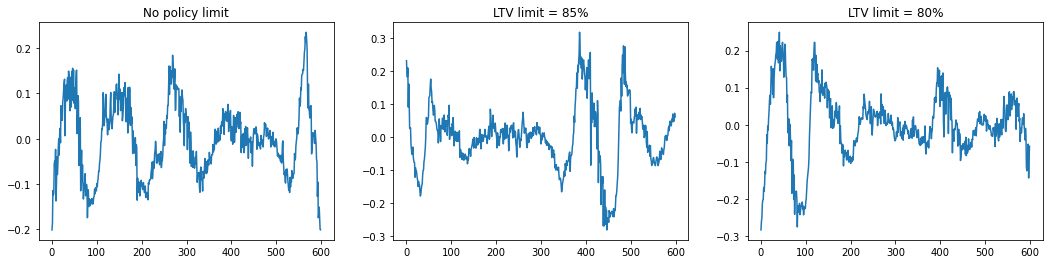

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
sale_cycle,sale_trend = hpfilter(hpi['Sale HPI'], lamb=129600)

sale_cycle85,sale_trend85 = hpfilter(hpi85['Sale HPI'], lamb=129600)

sale_cycle8,sale_trend8 = hpfilter(hpi8['Sale HPI'], lamb=129600)


fig, axes = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
sale_cycle.plot(ax=axes[0],title='No policy limit')
sale_cycle85.plot(ax=axes[1],title='LTV limit = 85%')
sale_cycle8.plot(ax=axes[2],title='LTV limit = 80%')


In [10]:
# LTI  compare

#LTI=3.35
output_lti = pd.read_csv('./LTI_SOFT/2023-08-16T04-19-11.779541Z/Output-run1.csv',sep=';',skipinitialspace=True)

_50_years_lti = output_lti[3001:].reset_index()

hpi_lti=_50_years_lti[['Sale HPI']]
hpai_lti = _50_years_lti[['Sale AnnualHPA']]

hpi_lti['Rental HPI'] = _50_years_lti[['Rental HPI']]

hpi_lti

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_46530/2217171126.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi_lti['Rental HPI'] = _50_years_lti[['Rental HPI']]


,Sale HPI,Rental HPI
0,0.8186,0.8982
1,0.8146,0.8807
2,0.8758,0.8984
3,0.8327,0.9000
4,0.8736,0.8838
...,...,...
595,0.7564,0.9394
596,0.7466,0.9523
597,0.7030,0.9223
598,0.7282,0.8900


In [11]:
#lti=2.325
output_lti2 = pd.read_csv('../A_new-run/lti_is_2.325/Output-run1.csv',sep=';',skipinitialspace=True)

_50_years_lti2 = output_lti2[3001:].reset_index()

hpi_lti2=_50_years_lti2[['Sale HPI']]
hpa_lti2 = _50_years_lti2[['Sale AnnualHPA']]

hpi_lti2['Rental HPI'] = _50_years_lti2[['Rental HPI']]

hpi_lti2

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_46530/3470439379.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi_lti2['Rental HPI'] = _50_years_lti2[['Rental HPI']]


,Sale HPI,Rental HPI
0,0.7251,1.0428
1,0.7318,1.0495
2,0.6865,1.0531
3,0.8158,1.0807
4,0.7661,1.0649
...,...,...
595,1.0935,1.0601
596,1.1011,1.0879
597,0.9070,1.0689
598,0.9070,1.0952


In [13]:
#lti=2.325
output_lti3 = pd.read_csv('../A_new-run/lti_is_1.67/Output-run1.csv',sep=';',skipinitialspace=True)

_50_years_lti3 = output_lti3[3001:].reset_index()

hpi_lti3=_50_years_lti3[['Sale HPI']]
hpa_lti3 = _50_years_lti3[['Sale AnnualHPA']]

hpi_lti3['Rental HPI'] = _50_years_lti3[['Rental HPI']]

hpi_lti3

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_46530/316377293.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi_lti3['Rental HPI'] = _50_years_lti3[['Rental HPI']]


,Sale HPI,Rental HPI
0,0.8751,0.9327
1,0.8623,0.9303
2,0.8810,0.9303
3,0.8802,0.9217
4,0.8171,0.9474
...,...,...
595,0.6373,0.9799
596,0.6198,0.9768
597,0.6543,0.9631
598,0.6329,0.9716


<AxesSubplot:title={'center':'LTI limit = 2.325'}>

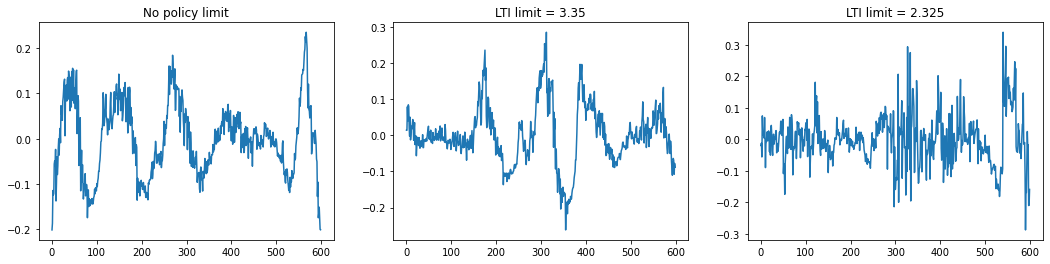

In [16]:
sale_cycle_lti,sale_trend_lti = hpfilter(hpi_lti['Sale HPI'], lamb=129600)

sale_cycle_lti2,sale_trend_lti2 = hpfilter(hpi_lti2['Sale HPI'], lamb=129600)

sale_cycle_lti3,sale_trend_lti3 = hpfilter(hpi_lti3['Sale HPI'], lamb=129600)


fig, axes = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
sale_cycle.plot(ax=axes[0],title='No policy limit')
sale_cycle_lti.plot(ax=axes[1],title='LTI limit = 3.35')
sale_cycle_lti2.plot(ax=axes[2],title='LTI limit = 2.325')
#sale_cycle_lti3.plot(ax=axes[3],title='LTI limit = 1.67')